In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fafb78085c2090fde3bba15311c320db


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dakar
Processing Record 2 of Set 1 | padang
Processing Record 3 of Set 1 | eyrarbakki
Processing Record 4 of Set 1 | jalu
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | avera
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | abomsa
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | wanning
Processing Record 16 of Set 1 | cloquet
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 1 | mogadishu
Processing Record 20 of Set 1 | barra patuca
Processing Record 21 of Set 1 | kahului
Processing Record 22 of Set 1 | whit

Processing Record 42 of Set 4 | san pedro
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | egvekinot
Processing Record 45 of Set 4 | newport
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | serrinha
Processing Record 48 of Set 4 | kondinskoye
Processing Record 49 of Set 4 | thompson
Processing Record 50 of Set 4 | bengkulu
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | keetmanshoop
Processing Record 3 of Set 5 | ulaangom
Processing Record 4 of Set 5 | dauphin
Processing Record 5 of Set 5 | port macquarie
Processing Record 6 of Set 5 | verkh-usugli
Processing Record 7 of Set 5 | deloraine
Processing Record 8 of Set 5 | khatanga
Processing Record 9 of Set 5 | esmeraldas
Processing Record 10 of Set 5 | buqayq
City not found. Skipping...
Processing Record 11 of Set 5 | waitati
Processing Record 12 of Set 5 | marzuq
Processing Record 13 of Set 5 | rock springs
Processing Record 14 of Set 5 | sokoni
Processing Record 15 of Set 

Processing Record 30 of Set 8 | san andres
Processing Record 31 of Set 8 | portland
Processing Record 32 of Set 8 | hoi an
Processing Record 33 of Set 8 | almaty
Processing Record 34 of Set 8 | nagapattinam
Processing Record 35 of Set 8 | llanes
Processing Record 36 of Set 8 | chegdomyn
Processing Record 37 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 38 of Set 8 | parnamirim
Processing Record 39 of Set 8 | lagos
Processing Record 40 of Set 8 | lasa
Processing Record 41 of Set 8 | manzil kamil
Processing Record 42 of Set 8 | kawalu
Processing Record 43 of Set 8 | chapais
Processing Record 44 of Set 8 | bonavista
Processing Record 45 of Set 8 | jiangyou
Processing Record 46 of Set 8 | quatre cocos
Processing Record 47 of Set 8 | porto santo
Processing Record 48 of Set 8 | djibo
Processing Record 49 of Set 8 | shirokiy
Processing Record 50 of Set 8 | emerald
Processing Record 1 of Set 9 | haveli
Processing Record 2 of Set 9 | tigil
Processing Record 3 of Set 9 | 

Processing Record 16 of Set 12 | areka
Processing Record 17 of Set 12 | pindiga
Processing Record 18 of Set 12 | kuytun
Processing Record 19 of Set 12 | yuci
Processing Record 20 of Set 12 | road town
Processing Record 21 of Set 12 | betsiamites
Processing Record 22 of Set 12 | pyaozerskiy
Processing Record 23 of Set 12 | havre-saint-pierre
Processing Record 24 of Set 12 | chardara
Processing Record 25 of Set 12 | vilyuysk
Processing Record 26 of Set 12 | barranca
Processing Record 27 of Set 12 | leningradskiy
Processing Record 28 of Set 12 | huarmey
Processing Record 29 of Set 12 | teya
Processing Record 30 of Set 12 | monchengladbach
Processing Record 31 of Set 12 | warqla
City not found. Skipping...
Processing Record 32 of Set 12 | liverpool
Processing Record 33 of Set 12 | negele
City not found. Skipping...
Processing Record 34 of Set 12 | teguldet
Processing Record 35 of Set 12 | rio gallegos
Processing Record 36 of Set 12 | junin
Processing Record 37 of Set 12 | upata
Processing 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dakar,14.6937,-17.4441,70.68,83,0,2.30,SN,2022-02-04 03:28:24
1,Padang,-0.9492,100.3543,84.25,70,92,2.55,ID,2022-02-04 03:29:55
2,Eyrarbakki,63.8630,-21.1481,28.45,74,38,24.49,IS,2022-02-04 03:32:29
3,Jalu,29.0331,21.5482,49.32,63,6,12.06,LY,2022-02-04 03:32:29
4,Vaini,-21.2000,-175.2000,86.16,79,75,10.36,TO,2022-02-04 03:32:29
5,Ushuaia,-54.8000,-68.3000,42.46,70,75,18.41,AR,2022-02-04 03:31:14
6,Avera,33.1940,-82.5271,69.75,78,100,15.39,US,2022-02-04 03:32:30
7,Atuona,-9.8000,-139.0333,78.96,71,3,17.87,PF,2022-02-04 03:32:30
8,Punta Arenas,-53.1500,-70.9167,42.91,61,75,10.36,CL,2022-02-04 03:28:56
9,Rikitea,-23.1203,-134.9692,78.22,74,100,17.02,PF,2022-02-04 03:32:31


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dakar,SN,2022-02-04 03:28:24,14.6937,-17.4441,70.68,83,0,2.30
1,Padang,ID,2022-02-04 03:29:55,-0.9492,100.3543,84.25,70,92,2.55
2,Eyrarbakki,IS,2022-02-04 03:32:29,63.8630,-21.1481,28.45,74,38,24.49
3,Jalu,LY,2022-02-04 03:32:29,29.0331,21.5482,49.32,63,6,12.06
4,Vaini,TO,2022-02-04 03:32:29,-21.2000,-175.2000,86.16,79,75,10.36
5,Ushuaia,AR,2022-02-04 03:31:14,-54.8000,-68.3000,42.46,70,75,18.41
6,Avera,US,2022-02-04 03:32:30,33.1940,-82.5271,69.75,78,100,15.39
7,Atuona,PF,2022-02-04 03:32:30,-9.8000,-139.0333,78.96,71,3,17.87
8,Punta Arenas,CL,2022-02-04 03:28:56,-53.1500,-70.9167,42.91,61,75,10.36
9,Rikitea,PF,2022-02-04 03:32:31,-23.1203,-134.9692,78.22,74,100,17.02


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/04/22'

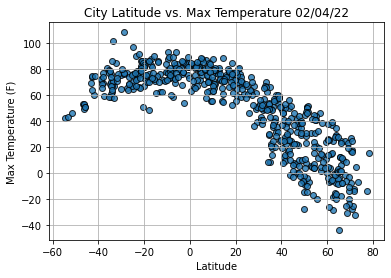

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

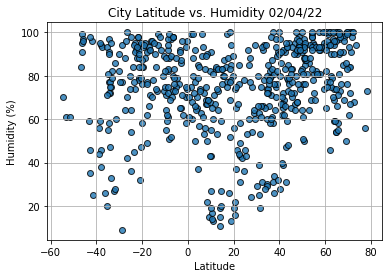

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

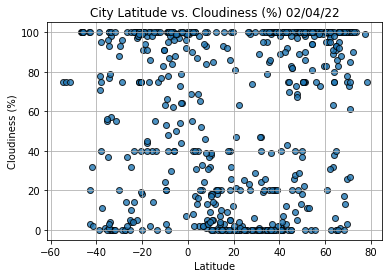

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

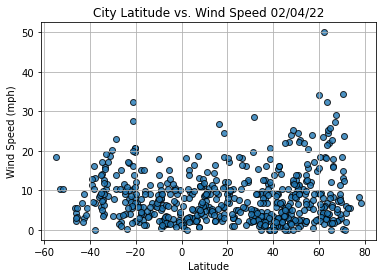

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()